# Lab 01. Matplotlib, OpenCV and Open3d.

The purpose of this assignment is to learn the basic usage of matplotlib, opencv and open3d.

Fill in the following functions according to the prompts. If the code you wrote is correct, you will get the same output as the cell below after you run the cell.

For example, uncomment the code in the function and run the cell in **TAG0**.

In [2]:
# Import packages firstly.
import matplotlib.pyplot as plt
import open3d as o3d
import imageio.v2 as imageio
import numpy as np
import cv2

## Matplotlib

### TAG0: Example,  Read an image using imageio and opencv.

Hint: Read the documentation of opencv and imageio on imread.


In [3]:
def read_image_cv_io(img_path):
    '''
    Input:
    img_path: string
    
    Return:
    img_cv: array, (H, W, 3)
    img_io: array, (H, W, 3)
    '''
    ##################################
    img_io = imageio.imread(img_path)
    img_cv = cv2.imread(img_path)
    return img_cv, img_io
    ##################################

img_path = 'lena.png'
img_cv, img_io = read_image_cv_io(img_path)
print('imageio image shape: \n', img_io.shape, '\nimage: \n', img_io)
print('opencv image shape: \n' , img_cv.shape, '\nimage: \n', img_cv)

imageio image shape: 
 (512, 512, 3) 
image: 
 [[[226 137 125]
  [226 137 125]
  [223 137 133]
  ...
  [230 148 122]
  [221 130 110]
  [200  99  90]]

 [[226 137 125]
  [226 137 125]
  [223 137 133]
  ...
  [230 148 122]
  [221 130 110]
  [200  99  90]]

 [[226 137 125]
  [226 137 125]
  [223 137 133]
  ...
  [230 148 122]
  [221 130 110]
  [200  99  90]]

 ...

 [[ 84  18  60]
  [ 84  18  60]
  [ 92  27  58]
  ...
  [173  73  84]
  [172  68  76]
  [177  62  79]]

 [[ 82  22  57]
  [ 82  22  57]
  [ 96  32  62]
  ...
  [179  70  79]
  [181  71  81]
  [185  74  81]]

 [[ 82  22  57]
  [ 82  22  57]
  [ 96  32  62]
  ...
  [179  70  79]
  [181  71  81]
  [185  74  81]]]
opencv image shape: 
 (512, 512, 3) 
image: 
 [[[125 137 226]
  [125 137 226]
  [133 137 223]
  ...
  [122 148 230]
  [110 130 221]
  [ 90  99 200]]

 [[125 137 226]
  [125 137 226]
  [133 137 223]
  ...
  [122 148 230]
  [110 130 221]
  [ 90  99 200]]

 [[125 137 226]
  [125 137 226]
  [133 137 223]
  ...
  [122 148 230]

### TAG1: Show these images using matplotlib.

Hint: Please refer to the documentation of matplotlib.pyplot as  on imshow function.

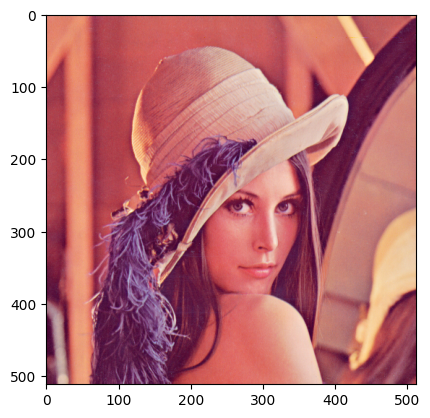

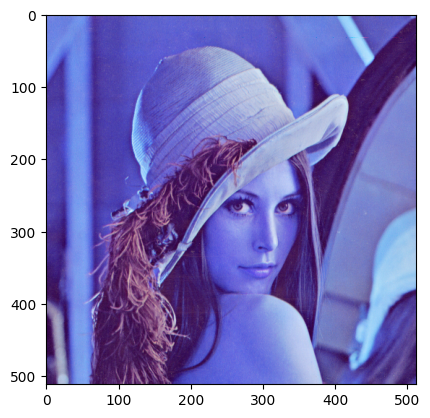

In [3]:
def show_image(img):
    '''
    Input:
    img: array, (H, W, 3)
    '''
    ################
    # Write your code here
    plt.imshow(img)
    plt.show()
    ################
show_image(img_io)
show_image(img_cv)    

### TAG2: Show these images in a 1x2 subplot.

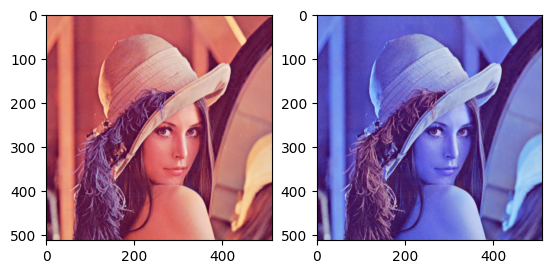

In [4]:
def show_images_subplot(images):
    '''
    Input: 
    images: tuple of 2 images
    '''
    ########################
    # Write your code here
    fig = plt.figure()
    for i in range(2):
        ax = fig.add_subplot(1, 2, i+1)
        ax.imshow(images[i])
    ########################
show_images_subplot((img_io, img_cv))

### TAG3: Show concated images using matplotlib

Hint: Read numpy's documentation on concatenate.

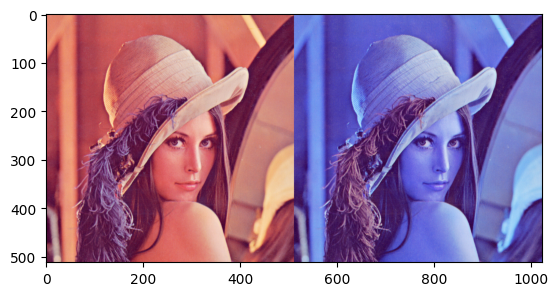

In [5]:
def concat_images(images):
    '''
    Input: 
    images: tuple of two images, ((H, W, 3), (H, W, 3))
    Output:
    image: (H, 2*W, 3)
    '''
    ########################
    # Write your code here
    img = np.concatenate(images, axis=1)
    return img
    
    ########################
    
show_image(concat_images((img_io, img_cv)))


### TAG4: Plot the function of y = 2 * x^2 - 3 during [-10, 10]

Hint: Read the documentation of matplotlib.pyplot on plot function.

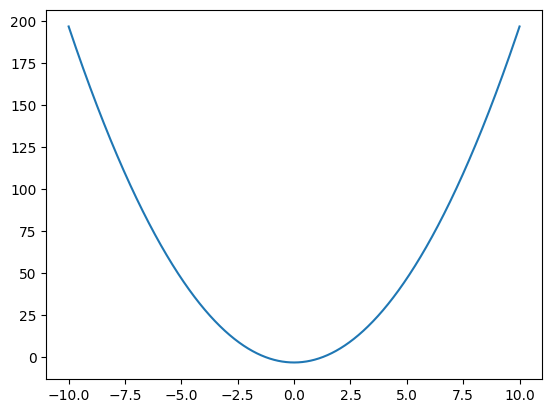

In [6]:
def func(x):
    return 2 * x**2 - 3

def plot(func):
    '''
    Input: 
    func: function, x*x^2-3
    '''
    ########################
    # Write your code here
    x_large = np.arange(-1000, 1001)
    x = x_large / 100
    y = 2 * (x ** 2) - 3
    plt.plot(x, y)
    ########################
    
plot(func)

## OpenCV

### TAG5: Convert and show images.

Note that you need to add a waitKey function after calling imshow in opencv.

Remember to destroy the windows using cv2.destroyAllWindows.

In [5]:
def convert_rgb_to_bgr(img):
    '''
    Input:
    img: (H, W, 3), RGB channels.
    Return:
    img: (H, W, 3), BGR channels.
    '''
    ########################
    # Write your code here
    ret = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    # or:
    # ret[:, :, [0, 2]] = img[:, :, [2, 0]]
    return ret
    ########################

def convert_rgb_to_gray(img):
    '''
    Input:
    img: (H, W, 3), RGB channels.
    Return:
    img: (H, W), Gray image.
    '''
    ########################
    # Write your code here
    ret = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    return ret
    ########################

def cv_imshow(img):
    '''
    Input:
    img: (H, W, 3), BGR channels
    '''
    ########################
    # Write your code here
    cv2.imshow("img", img)
    cv2.waitKey(0)
    # Windows will appear in your computer, try to find it.
    cv2.destroyAllWindows()
    cv2.waitKey(1)
    ########################
cv_imshow(convert_rgb_to_bgr(img_io))
cv_imshow(convert_rgb_to_gray(img_io))

### TAG6: Read videos and show videos.

Try to wait 10 ms between frames.

In [23]:
def read_and_show_video(video_path):
    '''
    Input: 
    video_path: string
    '''
    ########################
    # Write your code here
    cap = cv2.VideoCapture(video_path)
    while(cap.isOpened()):
        flag, frame = cap.read()
        if flag:
            cv2.imshow('frame', frame)
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break
        else:
            break
    cap.release()
    ########################

read_and_show_video('sfm.mp4')
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

### TAG7: Write your student ID in the image and save it.

In [47]:
def write_student_id(img):
    '''
    Input:
    img: (H, W, 3)
    Return:
    img: (H, W, 3)
    '''
    ########################
    # Write your code here
    text = "Hello CV!"
    sp = img.shape
    pos = ( sp[1]//2, sp[0]//2 )
    # <img> <text> <position> <font style> <font size> <font color> <font thickness>
    cv2.putText(img, text, pos, cv2.FONT_HERSHEY_SIMPLEX, 1.2, (255,255,255), 2)
    return img
    ########################

def write_img(img_path, img):
    '''
    Input: 
    img_path: string, 
    img: (H, W, 3), BGR channels with your student id
    '''
    ########################
    # Write your code here
    cv2.imwrite(img_path, img)
    ########################
    
write_img('result.png', write_student_id(img_cv.copy()))

## Open3d

### TAG8: Read and visualize 3D models (in point cloud).

Jupyter visualizer is defined in the JVisualizer class. Initialize the class, call add_geometry to add an Open3D geometry, and then call show to display the Jupyter widgets.

Please refer to the documentation of open3d on JVisualizer.

In [54]:
# The version of Python should be 3.7 or 3.6, and the version of open3d should be 0.9
# But my M1 Mac can't realize this (or troublesome), so I decide to ignore it.
from open3d import JVisualizer

def read_vis_model(model_path):
    '''
    Input:
    model_path: string, file path of a 3d model
    '''
    ########################
    # Write your code here
    pcd = o3d.io.read_point_cloud(model_path)
    visualizer = JVisualizer()
    visualizer.add_geometry(pcd)
    visualizer.show()
    ########################
read_vis_model('cat.ply')

ImportError: cannot import name 'JVisualizer' from 'open3d' (/opt/miniconda3/envs/ICV_LAB/lib/python3.8/site-packages/open3d/__init__.py)